# ベイズ線形回帰 (Bayesian linear regression)

In [1]:
using PyPlot, LinearAlgebra, Random

In [16]:
# Generate Toy datas
num_train, num_test = 20, 100 # sample size
dims = 4 # dimensions
σy = 0.3

Random.seed!(0);

x = rand(num_train)
y = sin.(2π*x) + σy * randn(num_train);
ϕ = hcat([x .^ p for p in 0:dims-1]...); # design matrix

xtest = range(0, 1, length=num_test)
ytest = sin.(2π*xtest)
ϕtest = hcat([xtest .^ p for p in 0:dims-1]...);

In [17]:
W = randn(5, dims);

In [4]:
ys = W * ϕtest';

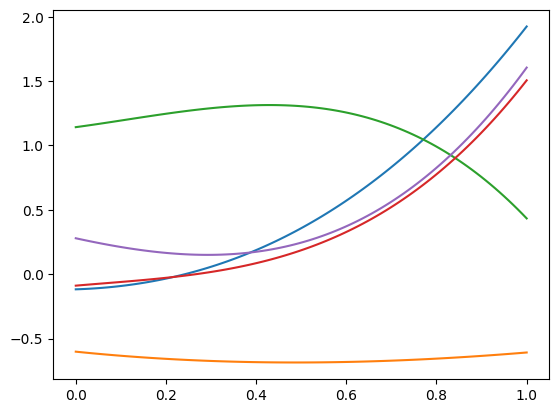

In [5]:
for i in 1:5
    plot(xtest, ys[i, :])
end

PRMLより．

パラメータ分布

$$
p(w)=\mathcal{N}(w|m_0, S_0)
$$

posterior

$$
p(w|t)=\mathcal{N}(w|m_N, S_N)
$$

ただし，

$$
\begin{align}
m_N &= \beta S_N \Phi^\top t\\
S_N^{-1}&=\alpha
\end{align}
$$

In [43]:
β = 5
α = 1e-3

0.001

In [44]:
Σ̂ = inv(α * I + β * ϕ' * ϕ)
μ̂ = β * Σ̂  * ϕ' * y;

$\alpha=0, \beta=1$のとき，正規方程式と同じになることを確認しよう．

In [45]:
μtest =  ϕtest * μ̂
σtest = sqrt.(1/β .+ diag(ϕtest * Σ̂ * ϕtest'));

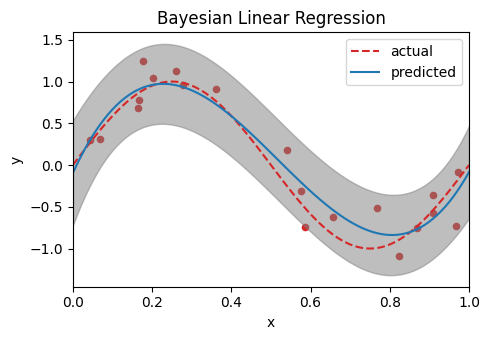

In [46]:
figure(figsize=(5,3.5))
title("Bayesian Linear Regression")
scatter(x, y, color="tab:red", s=20) # samples
plot(xtest, ytest, "--", label="actual", color="tab:red")  # regression line
plot(xtest, μtest, label="predicted")  # regression line
fill_between(xtest, μtest+σtest, μtest-σtest, alpha=0.5, color="tab:gray")
xlabel("x"); ylabel("y"); legend()
xlim(0, 1)
tight_layout()